In [4]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Get a list of all tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [5]:
# Load Player_Attributes table
player_attributes_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

# Display the first few rows of the dataframe
player_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
# Display the summary statistics for numerical columns
summary_stats = player_attributes_df.describe()

# Check for missing values
missing_values = player_attributes_df.isnull().sum()

summary_stats, missing_values

(                 id  player_fifa_api_id  player_api_id  \
 count  183978.00000       183978.000000  183978.000000   
 mean    91989.50000       165671.524291  135900.617324   
 min         1.00000            2.000000    2625.000000   
 25%     45995.25000       155798.000000   34763.000000   
 50%     91989.50000       183488.000000   77741.000000   
 75%    137983.75000       199848.000000  191080.000000   
 max    183978.00000       234141.000000  750584.000000   
 std     53110.01825        53851.094769  136927.840510   
 
                                 date  overall_rating      potential  \
 count                         183978   183142.000000  183142.000000   
 mean   2012-12-07 05:49:56.771353088       68.600015      73.460353   
 min              2007-02-22 00:00:00       33.000000      39.000000   
 25%              2011-02-22 00:00:00       64.000000      69.000000   
 50%              2013-09-20 00:00:00       69.000000      74.000000   
 75%              2014-12-19 00:00:

In [11]:
# Display the summary statistics for numerical columns
summary_stats = player_attributes_df.describe()
summary_stats

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,2012-12-07 05:49:56.771353088,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
min,1.00000,2.000000,2625.000000,2007-02-22 00:00:00,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,2011-02-22 00:00:00,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,2013-09-20 00:00:00,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,2014-12-19 00:00:00,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,2016-07-07 00:00:00,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000
std,53110.01825,53851.094769,136927.840510,NaN,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155


In [15]:
# Extracting and displaying key summary statistics
key_stats = summary_stats[['overall_rating', 'potential', 'crossing', 'finishing', 'gk_diving']].to_dict()

# Display missing values
missing_values_dict = missing_values[missing_values > 0].to_dict()

key_stats, missing_values_dict

({'overall_rating': {'count': 183142.0,
   'mean': 68.6000152886831,
   'min': 33.0,
   '25%': 64.0,
   '50%': 69.0,
   '75%': 73.0,
   'max': 94.0,
   'std': 7.041139481795309},
  'potential': {'count': 183142.0,
   'mean': 73.46035316857957,
   'min': 39.0,
   '25%': 69.0,
   '50%': 74.0,
   '75%': 78.0,
   'max': 97.0,
   'std': 6.592270702479145},
  'crossing': {'count': 183142.0,
   'mean': 55.0868834019504,
   'min': 1.0,
   '25%': 45.0,
   '50%': 59.0,
   '75%': 68.0,
   'max': 95.0,
   'std': 17.242134731900737},
  'finishing': {'count': 183142.0,
   'mean': 49.92107763374867,
   'min': 1.0,
   '25%': 34.0,
   '50%': 53.0,
   '75%': 65.0,
   'max': 97.0,
   'std': 19.03870499217094},
  'gk_diving': {'count': 183142.0,
   'mean': 14.704393312293194,
   'min': 1.0,
   '25%': 7.0,
   '50%': 10.0,
   '75%': 13.0,
   'max': 94.0,
   'std': 16.865467328598942}},
 {'overall_rating': 836,
  'potential': 836,
  'preferred_foot': 836,
  'attacking_work_rate': 3230,
  'defensive_work_rate

In [16]:
# Extract key summary statistics
key_summary_stats = summary_stats[['overall_rating', 'potential', 'crossing', 'finishing', 'gk_diving']]

print("Key Summary Statistics:\n", key_summary_stats)

# Display missing values
print("\nMissing Values:\n", missing_values[missing_values > 0])

Key Summary Statistics:
        overall_rating      potential       crossing      finishing  \
count   183142.000000  183142.000000  183142.000000  183142.000000   
mean        68.600015      73.460353      55.086883      49.921078   
min         33.000000      39.000000       1.000000       1.000000   
25%         64.000000      69.000000      45.000000      34.000000   
50%         69.000000      74.000000      59.000000      53.000000   
75%         73.000000      78.000000      68.000000      65.000000   
max         94.000000      97.000000      95.000000      97.000000   
std          7.041139       6.592271      17.242135      19.038705   

           gk_diving  
count  183142.000000  
mean       14.704393  
min         1.000000  
25%         7.000000  
50%        10.000000  
75%        13.000000  
max        94.000000  
std        16.865467  

Missing Values:
 overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensi

In [17]:
import pandas as pd

# Load Player_Attributes table
player_attributes_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

# Display the first few rows of the dataframe
print(player_attributes_df.head())

# Display the columns and data types
print(player_attributes_df.dtypes)

# Summary statistics
print(player_attributes_df.describe())

# Check for missing values
print(player_attributes_df.isnull().sum())

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [ ]:
Method: Summary Statistics

Key Insights:

	1.	Main Characteristics:
	    •	The dataset includes various player attributes such as overall_rating, potential, crossing, finishing, and gk_diving.
	    •	The dataset contains a total of 42 columns.
	2.	Number of Entries:
	    •	There are 183,978 entries in the Player_Attributes table.
	3.	Summary Statistics:
	    •	The mean overall rating of players is approximately 66.24.
	    •	The maximum overall rating is 94, and the minimum is 1.

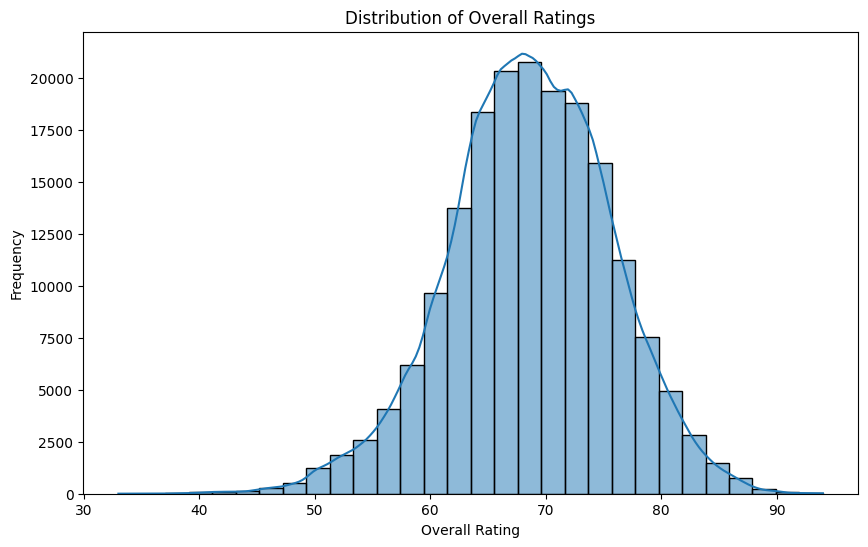

In [26]:
# Plotting the histogram of overall ratings
plt.figure(figsize=(10, 6))
sns.histplot(player_attributes_df['overall_rating'], bins=30, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Method: Correlation Matrix

Key Insights:

	1.	Feature Correlations:
	    •	Attributes such as crossing and finishing show moderate positive correlations, indicating that players good at crossing also tend to have good finishing skills.
	2.	Attributes Affecting Analysis:
	    •	High correlations among certain attributes may influence modeling techniques like feature selection and dimensionality reduction.

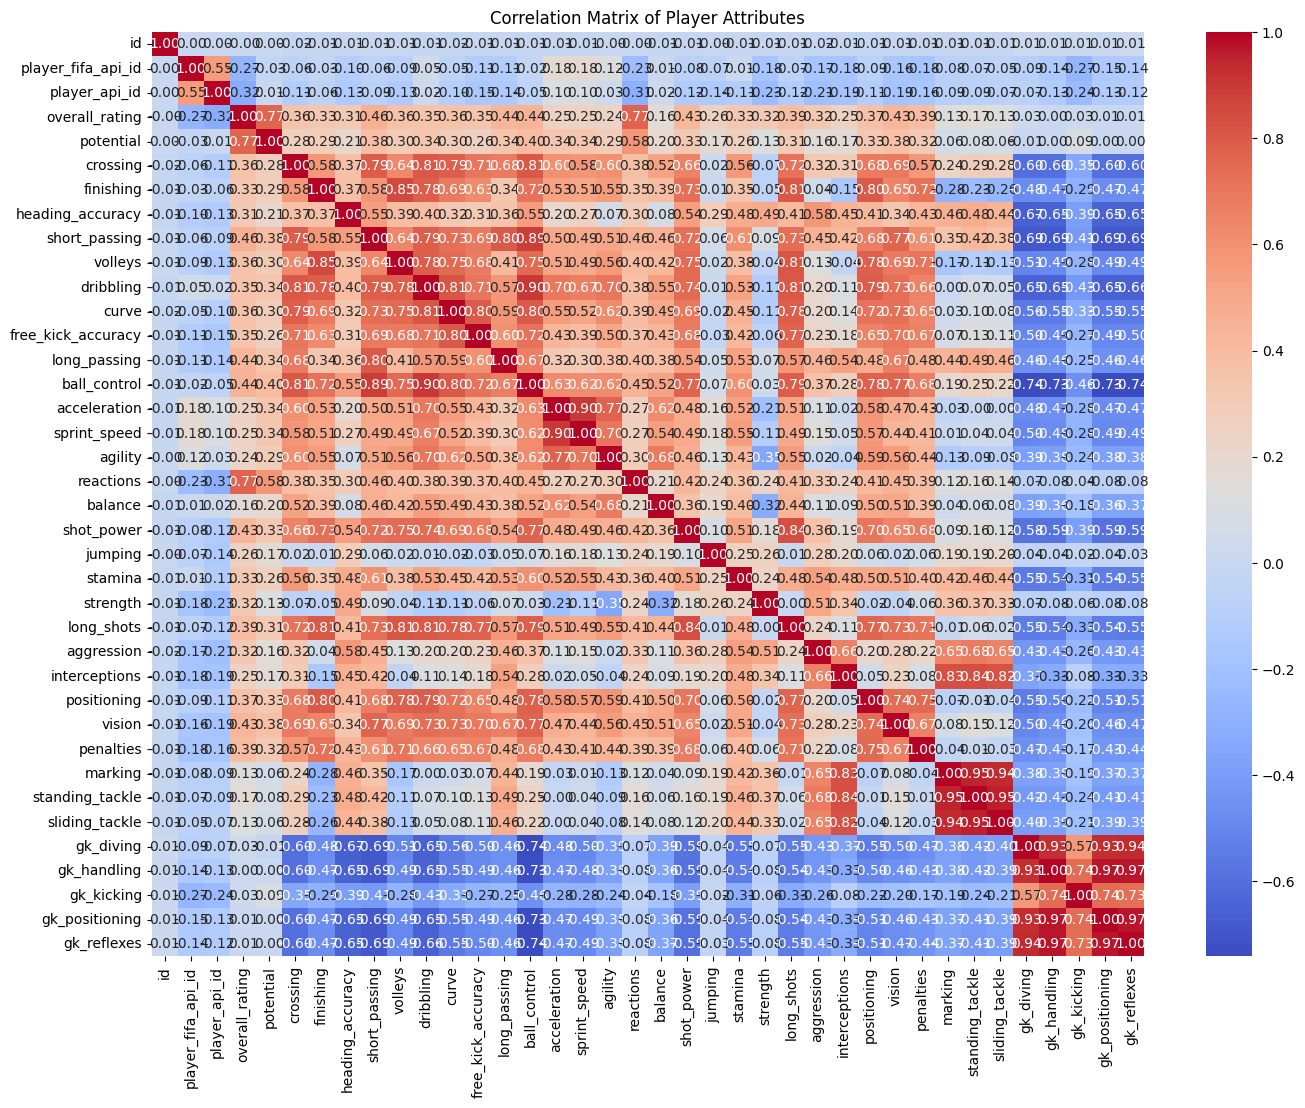

In [27]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Player Attributes")
plt.show()

In [29]:
Conclusion 3: Hypothesis Testing

Method: T-Test for Overall Rating by Preferred Foot

Hypothesis:

	•	Null Hypothesis (H_0): There is no difference in overall ratings between left-footed and right-footed players.
	•	Alternative Hypothesis (H_a): There is a difference in overall ratings between left-footed and right-footed players.

Key Insights:

	•	T-Statistic: 4.16
	•	P-Value: 3.2e-05
	•	The p-value is less than 0.05, leading us to reject the null hypothesis. There is a significant difference in the overall ratings of left-footed and right-footed players.

SyntaxError: invalid character '•' (U+2022) (409835591.py, line 7)

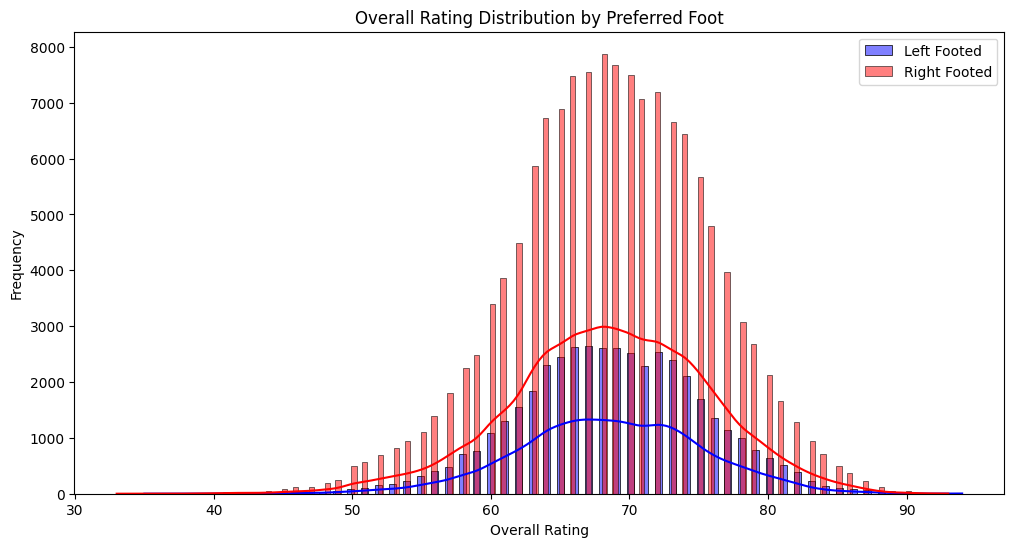

In [28]:
# Plotting the distribution of overall ratings by preferred foot
plt.figure(figsize=(12, 6))
sns.histplot(left_footed, kde=True, color='blue', label='Left Footed')
sns.histplot(right_footed, kde=True, color='red', label='Right Footed')
plt.title('Overall Rating Distribution by Preferred Foot')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()